In [239]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import KBinsDiscretizer

In [221]:
data = pd.read_csv('archive/cleaned_cervical_cancer_data.csv')

First, we split the data we want to discretize.

In [222]:
numerical_columns = [
    "Age",
    "Number of sexual partners",
    "First sexual intercourse",
    "Num of pregnancies",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives (years)",
    "IUD (years)",
    "STDs (number)",
    "STDs: Number of diagnosis",
]

numerical_data = data[numerical_columns]
categorical_data = data.drop(columns=numerical_columns)

numerical_data.shape, categorical_data.shape

total_data = pd.concat([numerical_data, categorical_data], axis=1)


😔 Sadly this next section yielded bad results, we need to manually discretize.

In [223]:
# def discretize(data):
#     discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
#     return discretizer.fit_transform(data)

# discretized_data = discretize(numerical_data)
# discretized_data = pd.DataFrame(discretized_data, columns=numerical_columns)


# discretized_data = pd.concat([discretized_data, categorical_data], axis=1)
# final_data = pd.DataFrame(discretized_data)
# final_data

In [224]:
# transactions =  []
# for i in range(0, len(data)):
#     transactions.append([str(data.values[i, j]) for j in range(0, data.shape[1])])


# results = apriori(
#     transactions,
#     min_support=0.003,
#     min_confidence=0.2,
#     min_lift=3,
#     min_length=2,
#     max_length=2,
# )


# def organize(results):
#     lado_izq = [tuple(resultado[2][0][0])[0] for resultado in results]
#     lado_der = [tuple(resultado[2][0][1])[0] for resultado in results]
#     supports = [resultado[1] for resultado in results]
#     confidences = [resultado[2][0][2] for resultado in results]
#     lifts = [resultado[2][0][3] for resultado in results]
#     return list(zip(lado_izq, lado_der, supports, confidences, lifts))


# df_resultados = pd.DataFrame(
#     organize(results),
#     columns=["Lado Izquierdo", "Lado Derecho", "Support", "Confidence", "Lift"],
# )

# df_resultados = df_resultados.sort_values(by="Lift", ascending=False)
# df_resultados.head(10)

First we get a sense of the number of bins/ranges we should divide our data in. 

Frequency Table for Age
            Bin  Frequency
0   13.00-16.55       35.0
1   16.55-20.10      129.0
2   20.10-23.65       99.0
3   23.65-27.20      115.0
4   27.20-30.75       83.0
5   30.75-34.30       76.0
6   34.30-37.85       60.0
7   37.85-41.40       36.0
8   41.40-44.95       14.0
9   44.95-48.50       11.0
10  48.50-52.05        6.0
11  52.05-55.60        0.0
12  55.60-59.15        0.0
13  59.15-62.70        0.0
14  62.70-66.25        0.0
15  66.25-69.80        0.0
16  69.80-73.35        2.0
17  73.35-76.90        0.0
18  76.90-80.45        1.0
19  80.45-84.00        1.0


Frequency Table for Number of sexual partners
            Bin  Frequency
0     1.00-2.35      377.0
1     2.35-3.70      176.0
2     3.70-5.05       98.0
3     5.05-6.40        7.0
4     6.40-7.75        5.0
5     7.75-9.10        4.0
6    9.10-10.45        0.0
7   10.45-11.80        0.0
8   11.80-13.15        0.0
9   13.15-14.50        0.0
10  14.50-15.85        0.0
11  15.85-17.20        0.0
12  17.20-

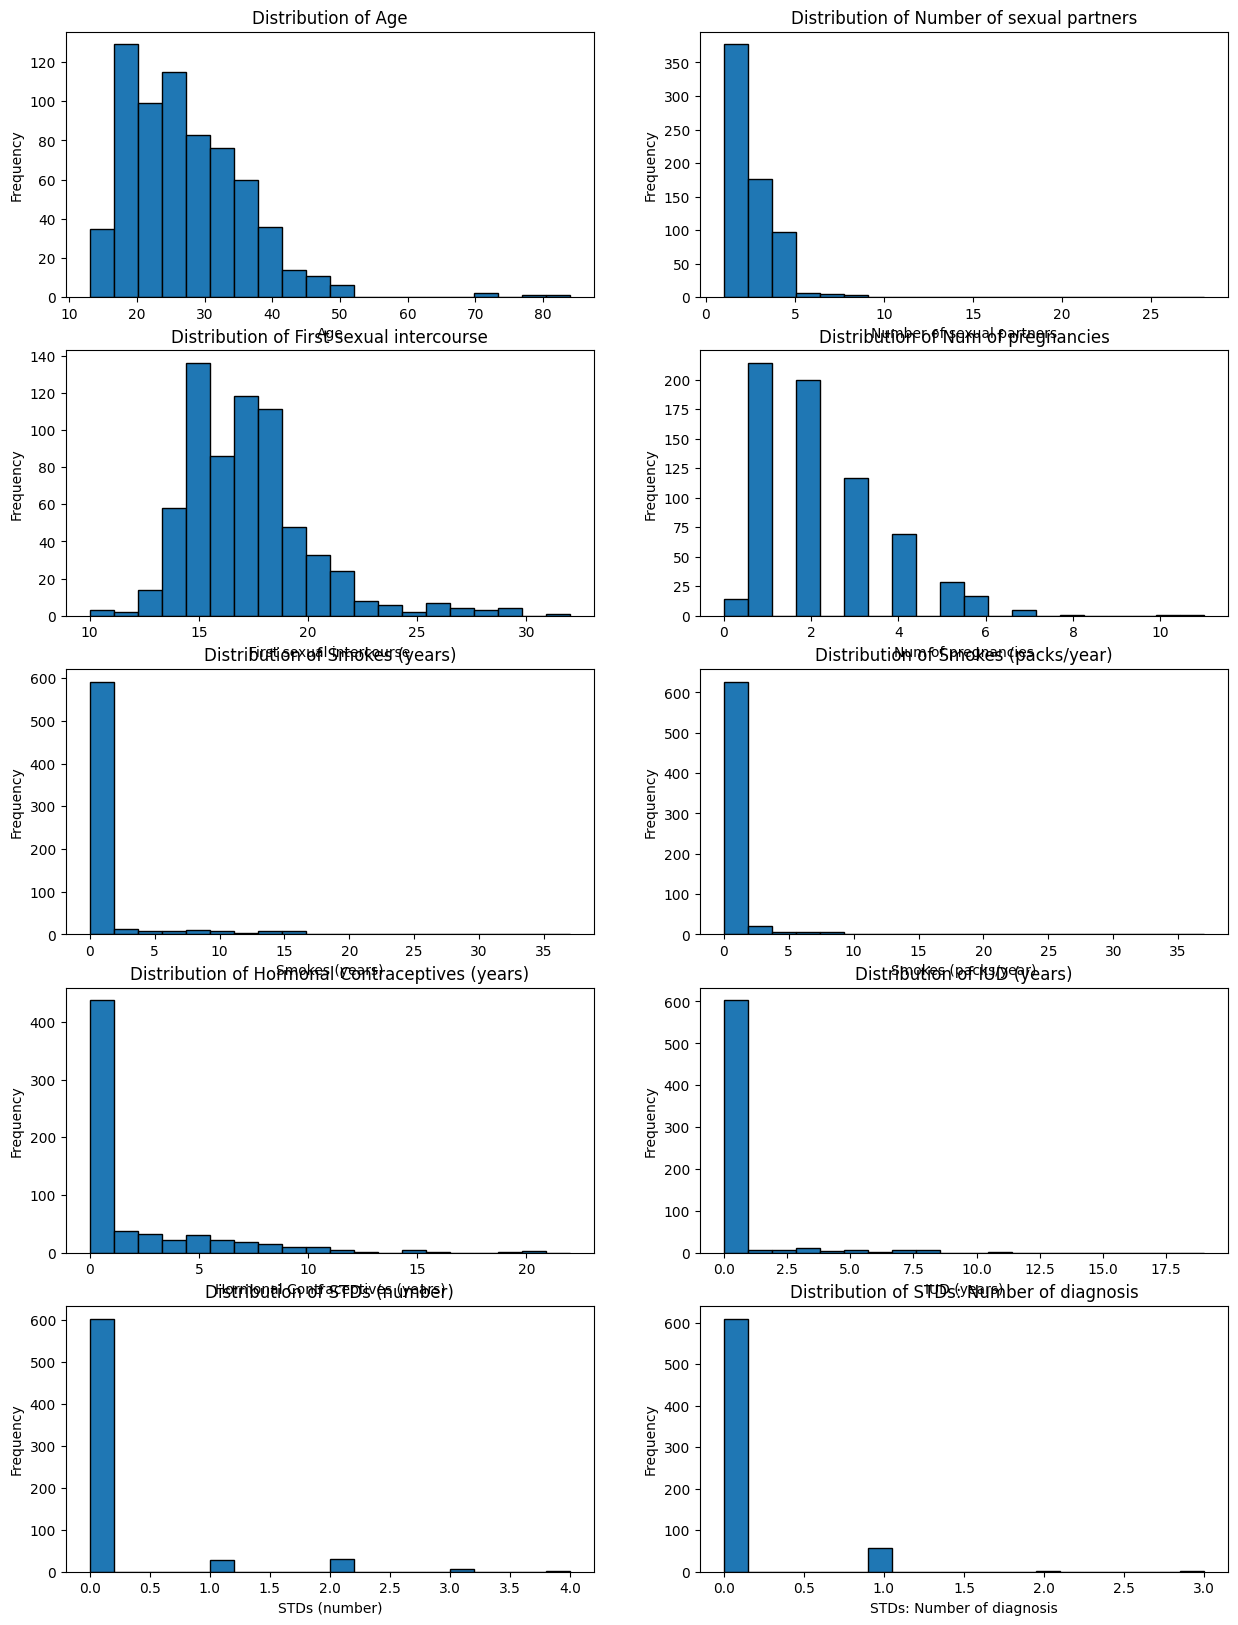

In [244]:
from matplotlib import pyplot as plt
def plot_histograms_and_get_frequencies(data, columns):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
    axes = axes.flatten()
    frequency_tables = {}

    for ax, col in zip(axes, columns):
        # Plot histogram
        counts, bin_edges, _ = ax.hist(data[col], bins=20, edgecolor="k")
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")

        # Generate frequency table
        bin_labels = [
            f"{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}"
            for i in range(len(bin_edges) - 1)
        ]
        frequency_table = pd.DataFrame({"Bin": bin_labels, "Frequency": counts})
        frequency_tables[col] = frequency_table
        

    plt.tight_layout()
    plt.show()

    return frequency_tables


# Generate histograms and frequency tables for numerical data
frequency_tables = plot_histograms_and_get_frequencies(
    numerical_data, numerical_columns
)

# Display frequency tables
for col, table in frequency_tables.items():
    print(f"Frequency Table for {col}")
    print(table)
    print("\n")

Manually Discretized Data
     Age Number of sexual partners First sexual intercourse  \
0  13-20                       2-4              10-15 years   
1  13-20                       1-2              10-15 years   
2    NaN                       4-6              15-18 years   
3  40-50                       2-4              18-21 years   
4  40-50                       2-4                21+ years   

  Num of pregnancies Smokes (years) Smokes (packs/year)  \
0     No pregnancies      0-2 years      0-2 packs/year   
1     No pregnancies      0-2 years      0-2 packs/year   
2     3+ pregnancies      10+ years      10+ packs/year   
3     3+ pregnancies      0-2 years      0-2 packs/year   
4        1 pregnancy      0-2 years      0-2 packs/year   

  Hormonal Contraceptives (years)    IUD (years) STDs (number)  \
0                    0-2 years HC  0-2 years IUD       No STDs   
1                    0-2 years HC  0-2 years IUD       No STDs   
2                    2-5 years HC  0-2 yea

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_68082/3618813618.py:56: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discretized_data = discretized_data.applymap(str)


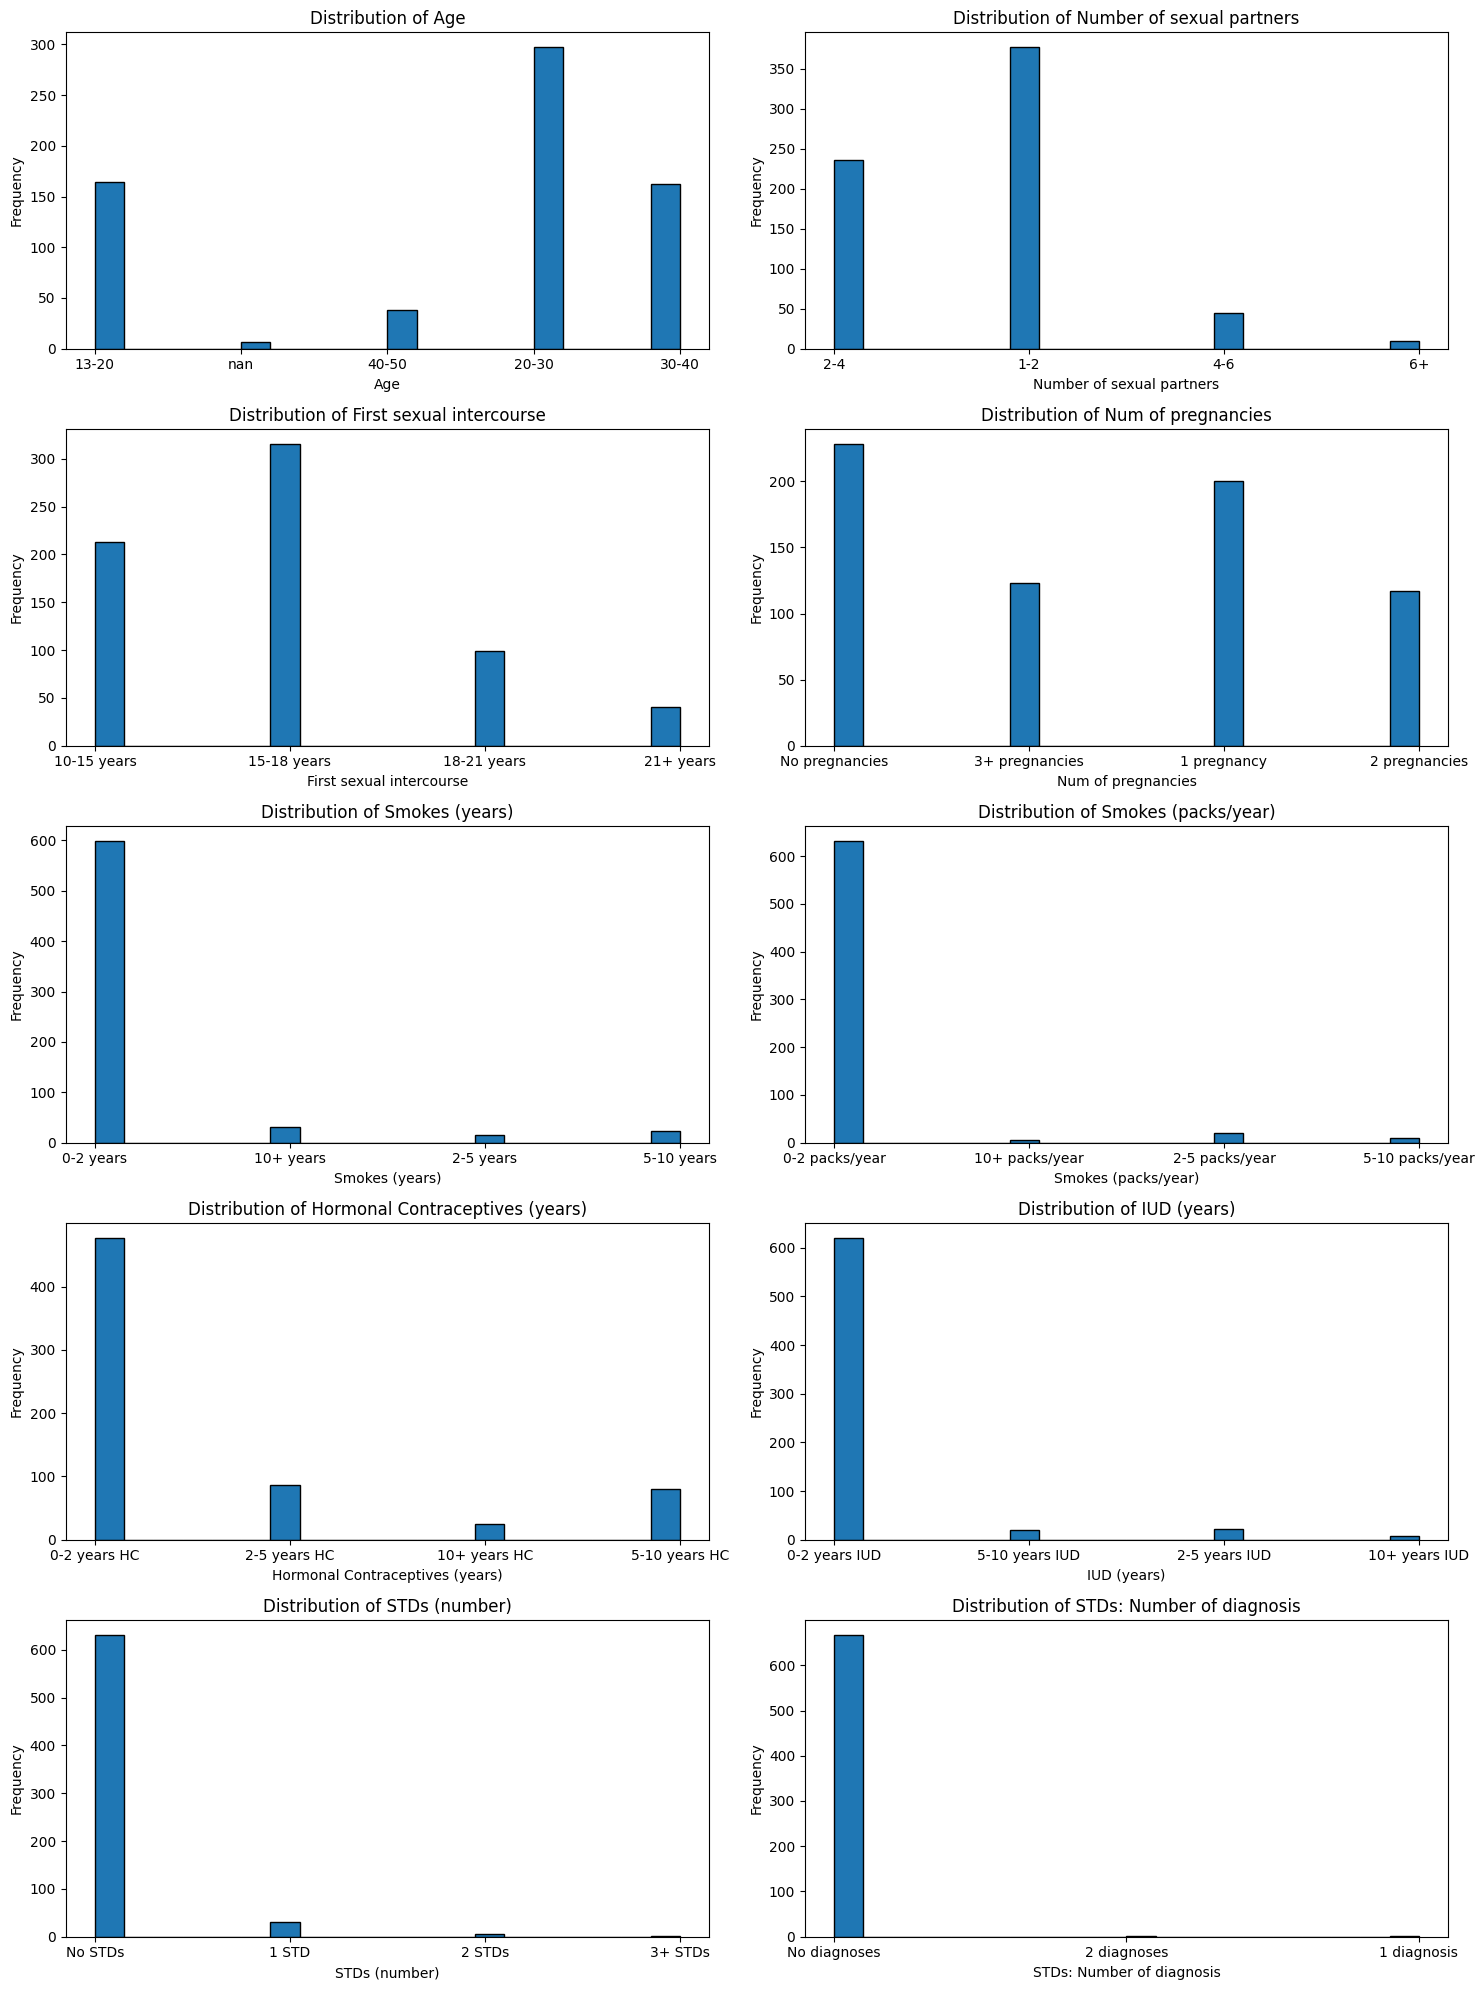

In [233]:
bins_dict = {
    "Age": ([13, 20, 30, 40, 50], ["13-20", "20-30", "30-40", "40-50"]),
    "Number of sexual partners": ([1, 2, 4, 6, np.inf], ["1-2", "2-4", "4-6", "6+"]),
    "First sexual intercourse": (
        [10, 15, 18, 21, np.inf],
        ["10-15 years", "15-18 years", "18-21 years", "21+ years"],
    ),
    "Num of pregnancies": (
        [0, 1, 2, 3, np.inf],
        ["No pregnancies", "1 pregnancy", "2 pregnancies", "3+ pregnancies"],
    ),
    "Smokes (years)": (
        [0, 2, 5, 10, np.inf],
        ["0-2 years", "2-5 years", "5-10 years", "10+ years"],
    ),
    "Smokes (packs/year)": (
        [0, 2, 5, 10, np.inf],
        ["0-2 packs/year", "2-5 packs/year", "5-10 packs/year", "10+ packs/year"],
    ),
    "Hormonal Contraceptives (years)": (
        [0, 2, 5, 10, np.inf],
        ["0-2 years HC", "2-5 years HC", "5-10 years HC", "10+ years HC"],
    ),
    "IUD (years)": (
        [0, 2, 5, 10, np.inf],
        ["0-2 years IUD", "2-5 years IUD", "5-10 years IUD", "10+ years IUD"],
    ),
    "STDs (number)": ([0, 1, 2, 3, np.inf], ["No STDs", "1 STD", "2 STDs", "3+ STDs"]),
    "STDs: Number of diagnosis": (
        [0, 1, 2, 3, np.inf],
        ["No diagnoses", "1 diagnosis", "2 diagnoses", "3+ diagnoses"],
    ),
}


# Function to manually discretize data based on custom bins and labels
def manual_discretize(data, bins_dict):
    discretized_data = data.copy()
    for col, (bins, labels) in bins_dict.items():
        discretized_data[col] = pd.cut(
            data[col], bins=bins, labels=labels, include_lowest=True
        )
    return discretized_data


# Apply manual discretization
discretized_data = manual_discretize(numerical_data, bins_dict)

# Combine with categorical data
discretized_data = pd.concat([discretized_data, categorical_data], axis=1)

print("Manually Discretized Data")
print(discretized_data.head())

print("Convert literally to string")
discretized_data = discretized_data.applymap(str)
print(discretized_data.head())

# graph all the discretized data
# Generate histograms and frequency tables for numerical data
frequency_tables = plot_histograms_and_get_frequencies(
    discretized_data, numerical_columns
)

In [234]:
transactions =  []
for i in range(0, len(discretized_data)):
    transactions.append(
        [
            str(discretized_data.values[i, j])
            for j in range(0, discretized_data.shape[1])
        ]
    )
print(transactions)

[['13-20', '2-4', '10-15 years', 'No pregnancies', '0-2 years', '0-2 packs/year', '0-2 years HC', '0-2 years IUD', 'No STDs', 'No diagnoses', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0', '0', '0', '0', '0'], ['13-20', '1-2', '10-15 years', 'No pregnancies', '0-2 years', '0-2 packs/year', '0-2 years HC', '0-2 years IUD', 'No STDs', 'No diagnoses', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0', '0', '0', '0', '0'], ['nan', '4-6', '15-18 years', '3+ pregnancies', '10+ years', '10+ packs/year', '2-5 years HC', '0-2 years IUD', 'No STDs', 'No diagnoses', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1', '0', '1', '0', '0', '0', '0', '0'], ['40-50', '2-4', '18-21 years', '3+ pregnancies', '0-2 years', '0-2 packs/year', '10+ years HC', '0-2 years IUD', 'No STDs', 'No diagnoses', '0.0', '1.0', '0.0',

In [235]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)



In [238]:
# Filter rules with high lift and moderate to high confidence
interesting_rules = rules[(rules["lift"] > 1.1) & (rules["confidence"] > 0.6)]
df = pd.DataFrame(interesting_rules)
# Display the further filtered rules
print("Further Filtered Interesting Rules")
print (df.head(10))

Further Filtered Interesting Rules
          antecedents     consequents  antecedent support  consequent support  \
100           (13-20)  (0-2 years HC)            0.245509            0.712575   
111  (No pregnancies)  (0-2 years HC)            0.341317            0.712575   
161     (1 pregnancy)           (1-2)            0.299401            0.564371   
169           (13-20)           (1-2)            0.245509            0.564371   
176  (No pregnancies)           (1-2)            0.341317            0.564371   
181   (2 pregnancies)           (1.0)            0.175150            0.744012   
183    (2-5 years HC)           (1.0)            0.130240            0.744012   
185  (3+ pregnancies)           (1.0)            0.184132            0.744012   
186           (30-40)           (1.0)            0.242515            0.744012   
187   (5-10 years HC)           (1.0)            0.119760            0.744012   

      support  confidence      lift  leverage  conviction  zhangs_metric 